In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import *
from sklearn import svm, preprocessing, cross_validation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import decomposition
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
import csv
%matplotlib inline

path = "C:\\Users\Andrew\Google Drive\Work\ActiveCampaign"
os.chdir(path)
os.getcwd()

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'C:\\Users\\Andrew\\Google Drive\\Work\\ActiveCampaign'

In [2]:
################ Data Manipulation

df_train = pd.read_csv('train.csv')
# df_train.head(10)
# df_train.describe()

df_test = pd.read_csv('test.csv')
# df_test.head(10)
# df_test.describe()

def clean_data(data):
    data.drop(['PassengerId', 'Ticket', 'Cabin'], axis = 1, inplace = True)
    # Pclass
    data['UpperClass'] = np.where(data.Pclass == 1, 1, 0)
    data['MiddleClass'] = np.where(data.Pclass == 2, 1, 0)
    data['LowerClass'] = np.where(data.Pclass == 3, 1, 0)
    data.drop(['Pclass'], axis = 1, inplace = True)
    
    # Age
    data.Age.replace(np.NaN, 28, inplace = True)
    
    # Embarked
    data['Southampton'] = np.where(data.Embarked == 'S', 1, 0)
    data['Queenstown'] = np.where(data.Embarked == 'Q', 1, 0)
    data['Cherbourg'] = np.where(data.Embarked == 'C', 1, 0)
    data.drop(['Embarked'], axis = 1, inplace = True)
    
    # Sex
    data.rename(columns = {'Sex': 'Male'}, inplace = True)
    data.Male = data.Male.map({'male' : 1, 'female' : 0}).astype(int)
    
    # Fare
    data.Fare.replace(np.NaN, 10, inplace = True)
    
    # Name
    data['Title'] = data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    data['Mr'] = np.where(data.Title == "Mr", 1, 0)
    data['Mrs'] = np.where(data.Title == "Mrs", 1, 0)
    data['Miss'] = np.where(data.Title == "Miss", 1, 0)
    data['Master'] = np.where(data.Title == "Master", 1, 0)
    data['OtherTitle'] = np.where((data.Title != "Mr") & (data.Title != "Mrs") & (data.Title != "Miss")
                                 & (data.Title != "Master"), 1, 0)
    data.drop(['Title'], axis = 1, inplace = True)
    data.drop(['Name'], axis = 1, inplace = True)
    
    # SibSp, Parch
    data['FamilySize'] = data.SibSp + data.Parch + 1
    data['Single'] = np.where(data.FamilySize == 1, 1, 0)
    data['SmallFamily'] = np.where((data.FamilySize < 5) & (data.FamilySize != 1), 1, 0)
    data['LargeFamily'] = np.where(data.FamilySize > 4, 1, 0)
#     data.drop(['SibSp'], axis = 1, inplace = True)
#     data.drop(['Parch'], axis = 1, inplace = True)
    
clean_data(df_train)
clean_data(df_test)
# pd.isnull(df_test).sum()
# df_train.head(10)
# pd.value_counts(df_train.LargeFamily)
# len(df_train.columns)

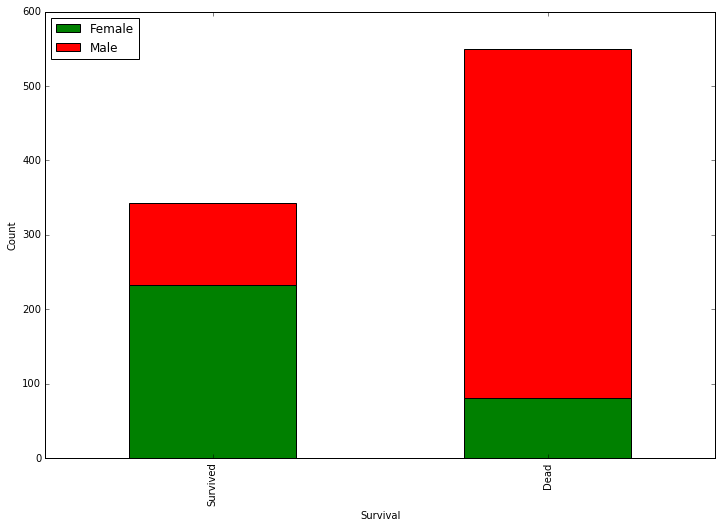

In [24]:
# Stacked Histogram of Survival Rates Based on Sex
survived_sex = df_train[df_train['Survived']==1]['Male'].value_counts()
dead_sex = df_train[df_train['Survived']==0]['Male'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(12,8), color = ['g', 'r'])
plt.xlabel("Survival")
plt.ylabel("Count")
plt.legend(["Female", "Male"], loc = "upper left")
plt.show()

In [5]:
# Stacked Histogram of Ages with Survival
plt.hist([df_train[df_train['Survived']==1]['Age'], df_train[df_train['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

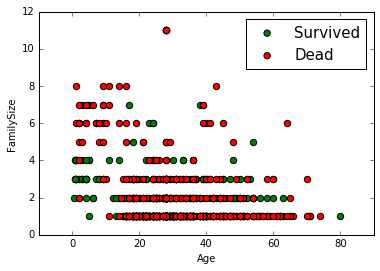

In [25]:
# Scatter Plot of Age vs Class with Survival
ax = plt.subplot()
ax.scatter(df_train[df_train['Survived']==1]['Age'],df_train[df_train['Survived']==1]['FamilySize'],c='green',s=40)
ax.scatter(df_train[df_train['Survived']==0]['Age'],df_train[df_train['Survived']==0]['FamilySize'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('FamilySize')
ax.legend(('Survived','Dead'),scatterpoints=1,loc='upper right',fontsize=15,)
plt.show()

In [108]:
# Correlation Matrix Plot
# df_train.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df_train.corr())
fig.colorbar(cax)
plt.xticks(range(len(df_train.columns)), df_train.columns)
plt.yticks(range(len(df_train.columns)), df_train.columns)
ax.set_xticklabels(list(df_train), rotation = 45, ha = 'left')
ax.set_yticklabels(list(df_train))
plt.show()

In [ ]:
################ Dimension Reduction / PCA
frames = [X_train, X_test]
data = pd.concat(frames)

std_data = StandardScaler().fit(data).transform(data)
pca = decomposition.PCA(n_components=)
pca.fit(std_data)
pev = pca.explained_variance_
data_pca = pca.transform(std_data)
X_train = data_pca[:891, :]
X_test = data_pca[891:, :]

print(data_pca.shape)
print(X.shape)
print(Xtest.shape)

In [40]:
################ Support Vector Machine
X_train = np.array(df_train.drop(['Survived'],1))
y_train = np.array(df_train['Survived'])

X_test = np.array(df_test)
# No y_test, y_test will be predictions

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
                     'C': [100, 110, 120, 125, 130, 140, 150]}]
cross_validation = StratifiedKFold(y_train, n_folds=5)

clf = GridSearchCV(svm.SVC(), 
                   scoring = "accuracy", 
                   param_grid = tuned_parameters, 
                   cv=cross_validation)
clf.fit(X_train, y_train)

parameters = clf.best_params_

print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

prediction = clf.predict(X_test)

pred = pd.DataFrame(prediction)
pred.rename(columns={ 0 : 'Survived'}, inplace=True) 
pred['PassengerID'] = range(892, len(pred) + 892)

# Within Sample Confusion Matrix
prediction_train = clf.predict(X_train)
confusion_matrix(y_train, prediction_train)
# correct = df_confusion[0][0] + df_confusion[1][1]
# correct/len(df_train)

Best score: 0.8125701459034792
Best parameters: {'kernel': 'rbf', 'gamma': 0.0001, 'C': 120}


0.82603815937149272

In [41]:
pred.to_csv('predictions.csv', sep=',', index = False)
# clf

In [52]:
################ RandomForest
parameter_grid = {
             'max_depth' : [4, 6, 8],
             'n_estimators': [10, 20, 30],
             'max_features': ['sqrt', 'auto', 'log2'],
             'min_samples_split': [0.5, 2, 3],
             'min_samples_leaf': [1, 3],
             'bootstrap': [True, False],
             }
forest = RandomForestClassifier()
cross_validation = StratifiedKFold(y_train, n_folds=5)

clf_RF = GridSearchCV(forest,
                    scoring='accuracy',
                    param_grid=parameter_grid,
                    cv=cross_validation)

clf_RF.fit(X_train, y_train)
parameters = clf_RF.best_params_

print('Best score: {}'.format(clf_RF.best_score_))
print('Best parameters: {}'.format(clf_RF.best_params_))

prediction = clf_RF.predict(X_test)

pred = pd.DataFrame(prediction)
pred.rename(columns={ 0 : 'Survived'}, inplace=True) 
pred['PassengerID'] = range(892, len(pred) + 892)

Best score: 0.8338945005611672
Best parameters: {'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 20, 'min_samples_leaf': 1, 'max_depth': 4, 'min_samples_split': 2}


In [53]:
pred.to_csv('predictions.csv', sep=',', index = False)

In [11]:
################ Neural Network

from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
# import multiprocessing
# num_processor=4

X_train = np.array(df_train.drop(['Survived'],1))
y_train = np.array(df_train['Survived'])

X_test = np.array(df_test)

# Function to create model, required for KerasClassifier
def create_model(neurons1, neurons2):
    # create model
    model = Sequential()
    model.add(Dense(neurons1, input_dim=20, init='uniform', activation='tanh'))
    model.add(Dropout(0.2))
    
    model.add(Dense(neurons2, init='uniform', activation='tanh'))
    model.add(Dropout(0.2))
    
    model.add(Dense(1, init='uniform', activation='softmax'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return(model)

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# pool = multiprocessing.Pool(num_processor)

# create model
model = KerasClassifier(build_fn=create_model, 
                        nb_epoch=10, 
                        batch_size=50, 
                        verbose=0)

# define the grid search parameters
neurons1 = [1, 5, 10, 15, 20]
neurons2 = [1, 5, 10, 15, 20]
param_grid = dict(neurons1=neurons1, neurons2=neurons2)
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    cv = 5)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.383838 using {'neurons2': 1, 'neurons1': 1}


In [ ]:
prediction = grid_result.predict(X_test)

pred = pd.DataFrame(prediction)
pred.rename(columns={ 0 : 'Survived'}, inplace=True) 
pred['PassengerID'] = range(892, len(pred) + 892)